# 🏆 Football Player Performance Classification

## Project Goal: Predicting Player Performance Levels (Poor, Weak, Good, Excellent)

In this project, we aim to classify football players' performance levels using their game statistics into four categories:
- 🔴 **Poor** (Bottom 25% of ratings)  
- 🟡 **Weak** (Next 25%)
- 🟢 **Good** (Next 25%)  
- 🌟 **Excellent** (Top 25% of ratings)

### Available Features:
- Game statistics: Goals, passes, dribbles, tackles, etc.
- Position information: Player position
- Match context: Team, date, competition

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 📊 Data Loading and Exploration

Let's start by loading the football ratings dataset and exploring its structure.

In [2]:
# Load the dataset
df = pd.read_csv('/home/malekipourdev/projects/ml-football/data/data_football_ratings.csv')

print("📊 Dataset Basic Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n" + "="*50)

# Display first few rows
print("\n🔍 First 5 rows:")
df.head()

📊 Dataset Basic Information:
Shape: (50652, 63)
Columns: ['competition', 'date', 'match', 'team', 'pos', 'pos_role', 'player', 'rater', 'is_human', 'original_rating', 'goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked', 'chances2score', 'drib_success', 'drib_unsuccess', 'keypasses', 'touches', 'passes_acc', 'passes_inacc', 'crosses_acc', 'crosses_inacc', 'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l', 'aerials_w', 'aerials_l', 'poss_lost', 'fouls', 'wasfouled', 'clearances', 'stop_shots', 'interceptions', 'tackles', 'dribbled_past', 'tballs_acc', 'tballs_inacc', 'ycards', 'rcards', 'dangmistakes', 'countattack', 'offsides', 'goals_ag_otb', 'goals_ag_itb', 'saves_itb', 'saves_otb', 'saved_pen', 'missed_penalties', 'owngoals', 'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'flow_success', 'betweenness2goals', 'win', 'lost', 'is_home_team', 'minutesPlayed', 'game_duration']


🔍 First 5 rows:


,competition,date,match,team,pos,pos_role,player,rater,is_human,original_rating,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
0,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,Kicker,1,3.50,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
1,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,WhoScored,0,6.56,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
2,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,SofaScore,0,6.70,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
3,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,Sub,Sub,Anthony Martial,WhoScored,0,6.19,...,0.051556,0.524845,0.041096,0.166667,0.0,1,0,1,13,90
4,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,MF,DMC,Mihai Pintilii,Kicker,1,3.50,...,0.333284,0.710084,0.347826,0.675075,0.0,0,1,0,90,90


In [3]:
# Dataset information
print("📋 Dataset Info:")
print(df.info())

print("\n" + "="*50)

# Check missing values
print("\n❓ Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✅ No missing values found!")

print("\n" + "="*50)

# Target variable distribution
print("\n🎯 Target Variable Distribution:")
target_dist = df['is_human'].value_counts()
print(target_dist)
print(f"\nPercentage distribution:")
print(df['is_human'].value_counts(normalize=True) * 100)

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50652 entries, 0 to 50651
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competition             50652 non-null  object 
 1   date                    50652 non-null  object 
 2   match                   50652 non-null  object 
 3   team                    50652 non-null  object 
 4   pos                     50652 non-null  object 
 5   pos_role                50652 non-null  object 
 6   player                  50652 non-null  object 
 7   rater                   50652 non-null  object 
 8   is_human                50652 non-null  int64  
 9   original_rating         50652 non-null  float64
 10  goals                   50652 non-null  int64  
 11  assists                 50652 non-null  int64  
 12  shots_ontarget          50652 non-null  int64  
 13  shots_offtarget         50652 non-null  int64  
 14  shotsblocked          

In [4]:
# Feature Analysis and Normalization
print("🔍 Feature Analysis:")
print()

# Analyze categorical features
features_to_explore = ['competition', 'team', 'pos', 'pos_role', 'rater', 'original_rating']

for feature in features_to_explore:
    unique_values = df[feature].nunique()
    print(f"{feature.upper()}:")
    print(f"  Unique values: {unique_values}")
    
    if feature == 'original_rating':
        print(f"  Mean: {df[feature].mean():.2f}")
        print(f"  Min: {df[feature].min()}")
        print(f"  Max: {df[feature].max()}")
        print(f"  Unique values: {unique_values}")
    elif unique_values <= 20:
        print(f"  Values: {df[feature].unique()}")
    else:
        print(f"  Top 5 values: {df[feature].value_counts().head().index.tolist()}")
    print()

print("="*50)

# Rating distribution by rater
print("\n📊 Rating Distribution by Rater:")
rating_by_rater = df.groupby('rater')['original_rating'].agg(['min', 'max', 'mean', 'count'])
print(rating_by_rater)

# Create normalized rating
print("\n🔧 Creating normalized_rating...")
print("   Normalizing ratings to 0-1 scale based on rater's scale")

def normalize_rating(row):
    """Normalize ratings based on rater's scale"""
    if row['rater'] in ['Kicker', 'Bild']:
        # Scale 1-6 -> 0-1
        return (row['original_rating'] - 1) / 5
    else:
        # Scale 1-10 -> 0-1  
        return (row['original_rating'] - 1) / 9

df['normalized_rating'] = df.apply(normalize_rating, axis=1)

print("✅ Normalized rating created!")
print(f"   Range: [{df['normalized_rating'].min():.3f}, {df['normalized_rating'].max():.3f}]")
print(f"   Mean: {df['normalized_rating'].mean():.3f}")
print(f"   Std: {df['normalized_rating'].std():.3f}")

🔍 Feature Analysis:

COMPETITION:
  Unique values: 4
  Values: ['Euro 2016' 'Premier League 2017-18' 'Bundesliga 2017-18'
 'World Cup 2018']

TEAM:
  Unique values: 82
  Top 5 values: ['Hoffenheim', 'Schalke 04', 'Borussia M.Gladbach', 'Hamburger SV', 'Augsburg']

POS:
  Unique values: 5
  Values: ['DF' 'Sub' 'MF' 'FW' 'GK']

POS_ROLE:
  Unique values: 17
  Values: ['DC' 'Sub' 'DMC' 'FW' 'DL' 'MC' 'FWL' 'AMC' 'AML' 'DR' 'AMR' 'GK' 'FWR'
 'MR' 'ML' 'DMR' 'DML']

RATER:
  Unique values: 6
  Values: ['Kicker' 'WhoScored' 'SofaScore' 'TheGuardian' 'SkySports' 'Bild']

ORIGINAL_RATING:
  Unique values: 515
  Mean: 5.69
  Min: 1.0
  Max: 10.0
  Unique values: 515


📊 Rating Distribution by Rater:
              min   max      mean  count
rater                                   
Bild         1.00   6.0  3.534155   5519
Kicker       1.00   6.0  3.496020   9548
SkySports    2.00  10.0  6.234507  11134
SofaScore    3.00  10.0  6.942090   2402
TheGuardian  3.00   9.0  6.223022    695
WhoScored    

## 🎯 Target Variable Creation

Let's create our target variable based on performance categories using rating quartiles.

In [5]:
# Create target variable: performance_category
# Based on normalized_rating quartiles

print("🎯 Creating target variable: performance_category")
print("="*50)

# Calculate quartiles
q1 = df['normalized_rating'].quantile(0.25)
q2 = df['normalized_rating'].quantile(0.50)
q3 = df['normalized_rating'].quantile(0.75)

print(f"📊 Quartiles:")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q2 (50%): {q2:.2f}")
print(f"Q3 (75%): {q3:.2f}")

# Create categories
def create_performance_category(rating):
    if rating <= q1:
        return 'poor'        # aftezah
    elif rating <= q2:
        return 'weak'        # za'eef  
    elif rating <= q3:
        return 'good'        # khoob
    else:
        return 'excellent'   # aali

df['performance_category'] = df['normalized_rating'].apply(create_performance_category)

# Show distribution
print(f"\n📈 Performance category distribution:")
category_dist = df['performance_category'].value_counts()
print(category_dist)

print(f"\n📊 Percentage of each category:")
print(df['performance_category'].value_counts(normalize=True) * 100)

🎯 Creating target variable: performance_category
📊 Quartiles:
Q1 (25%): 0.55
Q2 (50%): 0.60
Q3 (75%): 0.67

📈 Performance category distribution:
performance_category
weak         14303
poor         12785
excellent    12104
good         11460
Name: count, dtype: int64

📊 Percentage of each category:
performance_category
weak         28.237779
poor         25.240859
excellent    23.896391
good         22.624970
Name: proportion, dtype: float64


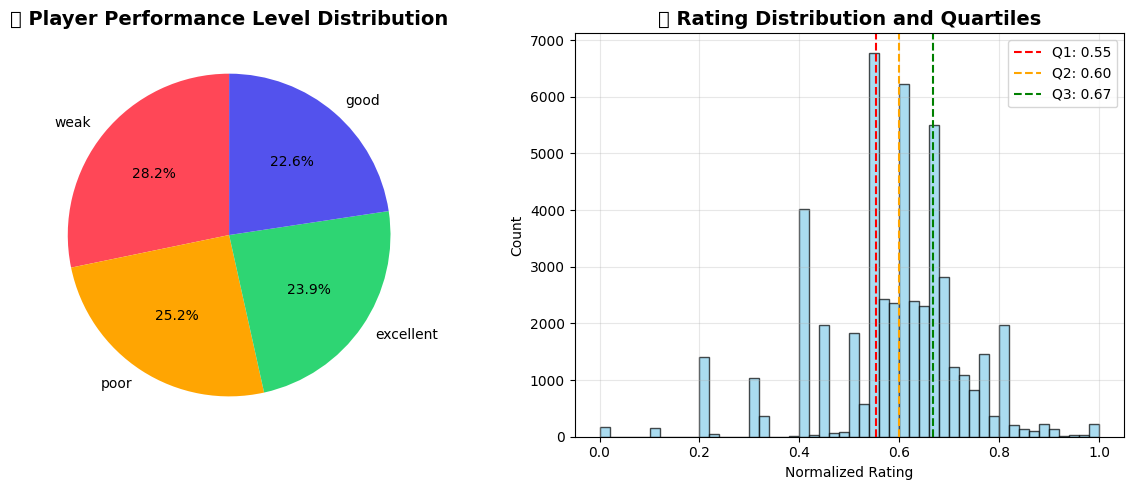

In [6]:
# Performance Category Visualization
plt.figure(figsize=(12, 5))

# Performance category distribution chart
plt.subplot(1, 2, 1)
category_counts = df['performance_category'].value_counts()
colors = ['#ff4757', '#ffa502', '#2ed573', '#5352ed']  # Red, Orange, Green, Blue
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('📊 Player Performance Level Distribution', fontsize=14, fontweight='bold')

# Normalized rating distribution chart
plt.subplot(1, 2, 2)
plt.hist(df['normalized_rating'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='orange', linestyle='--', label=f'Q2: {q2:.2f}')
plt.axvline(q3, color='green', linestyle='--', label=f'Q3: {q3:.2f}')
plt.xlabel('Normalized Rating')
plt.ylabel('Count')
plt.title('📈 Rating Distribution and Quartiles', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Convert categorical features to numeric using one-hot encoding
categorical_features = ['competition', 'team', 'pos', 'pos_role', 'rater']

print("🔄 Applying One-Hot Encoding...")

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features)

print("✅ One-Hot Encoding Complete!")
print(f"Original feature count: {X.shape[1]}")
print(f"Encoded feature count: {X_encoded.shape[1]}")

# Display the first few columns of encoded features
print(f"\nFirst 10 encoded features: {X_encoded.columns[:10].tolist()}")
print(f"Last 10 encoded features: {X_encoded.columns[-10:].tolist()}")

# Check for any missing values after encoding
if X_encoded.isnull().sum().sum() == 0:
    print("\n✅ No missing values in encoded features!")
else:
    print(f"\n⚠️ Found {X_encoded.isnull().sum().sum()} missing values in encoded features")

🔄 Applying One-Hot Encoding...
✅ One-Hot Encoding Complete!
Original feature count: 64
Encoded feature count: 173

First 10 encoded features: ['date', 'match', 'player', 'is_human', 'original_rating', 'goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked']
Last 10 encoded features: ['pos_role_MC', 'pos_role_ML', 'pos_role_MR', 'pos_role_Sub', 'rater_Bild', 'rater_Kicker', 'rater_SkySports', 'rater_SofaScore', 'rater_TheGuardian', 'rater_WhoScored']

✅ No missing values in encoded features!


In [9]:
# Data Splitting for performance_category
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("📊 Dataset Split Complete!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

print(f"\n🎯 Class Distribution:")
print("Training set:")
train_dist = y_train.value_counts(normalize=True)
print(train_dist)

print("\nTesting set:")
test_dist = y_test.value_counts(normalize=True)
print(test_dist)
classification
# Calculate baseline accuracy (if we always predict the majority class)
baseline_accuracy = train_dist.max()
print(f"\n📈 Baseline Accuracy (majority class): {baseline_accuracy:.3f} ({baseline_accuracy*100:.1f}%)")

📊 Dataset Split Complete!
Training set: 40521 samples
Testing set: 10131 samples
Number of features: 64

🎯 Class Distribution:
Training set:
performance_category
weak         0.282372
poor         0.252412
excellent    0.238963
good         0.226253
Name: proportion, dtype: float64

Testing set:
performance_category
weak         0.282401
poor         0.252394
excellent    0.238969
good         0.226236
Name: proportion, dtype: float64


📊 Dataset Split Complete!
Training set: 40521 samples
Testing set: 10131 samples
Number of features: 64

🎯 Class Distribution:
Training set:
performance_category
weak         0.282372
poor         0.252412
excellent    0.238963
good         0.226253
Name: proportion, dtype: float64

Testing set:
performance_category
weak         0.282401
poor         0.252394
excellent    0.238969
good         0.226236
Name: proportion, dtype: float64


NameError: name 'classification' is not defined

In [ ]:
# Preprocessing: One-Hot Encoding
from sklearn.preprocessing import LabelEncoder
import pandas as pd

print("🔄 Preprocessing and Encoding...")
print("="*50)

# Separate numerical and categorical features
numerical_features = ['goals', 'assists', 'shots_ontarget', 'shots_offtarget',
                     'keypasses', 'passes_acc', 'passes_inacc', 'drib_success', 'drib_unsuccess',
                     'tackles', 'interceptions', 'clearances', 'aerials_w', 'aerials_l', 
                     'grduels_w', 'grduels_l', 'poss_lost', 'fouls', 'wasfouled',
                     'touches', 'shotsblocked', 'chances2score', 'ycards', 'rcards', 'dangmistakes']

categorical_features = ['competition', 'pos', 'pos_role', 'team']

print(f"📊 Feature breakdown:")
print(f"   Numerical features: {len(numerical_features)}")
print(f"   Categorical features: {len(categorical_features)}")

# Apply one-hot encoding to training data
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, prefix=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, prefix=categorical_features)

# Align columns (ensure both train and test have same columns)
all_columns = list(set(X_train_encoded.columns) | set(X_test_encoded.columns))
X_train_encoded = X_train_encoded.reindex(columns=all_columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=all_columns, fill_value=0)

print(f"\n✅ Encoding Complete!")
print(f"   Original features: {X_train.shape[1]}")
print(f"   Encoded features: {X_train_encoded.shape[1]}")
print(f"   Training samples: {X_train_encoded.shape[0]}")
print(f"   Test samples: {X_test_encoded.shape[0]}")

# Check for missing values
print(f"\n🔍 Missing values check:")
print(f"   Training set: {X_train_encoded.isnull().sum().sum()}")
print(f"   Test set: {X_test_encoded.isnull().sum().sum()}")

🔄 Preprocessing and Encoding...
📊 Feature breakdown:
   Numerical features: 25
   Categorical features: 4

✅ Encoding Complete!
   Original features: 64
   Encoded features: 168
   Training samples: 40521
   Test samples: 10131

🔍 Missing values check:
   Training set: 0
   Test set: 0
   Test set: 0


In [ ]:
# Machine Learning Models (Without Data Leakage)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb

print("🚀 Training Machine Learning Models (Without Data Leakage)")
print("="*70)

# Update numerical features list (without normalized_rating)
numerical_features = ['goals', 'assists', 'shots_ontarget', 'shots_offtarget',
                     'keypasses', 'passes_acc', 'passes_inacc', 'drib_success', 'drib_unsuccess',
                     'tackles', 'interceptions', 'clearances', 'aerials_w', 'aerials_l', 
                     'grduels_w', 'grduels_l', 'poss_lost', 'fouls', 'wasfouled',
                     'touches', 'shotsblocked', 'chances2score', 'ycards', 'rcards', 'dangmistakes']

# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_estimators=100, verbose=-1),
    'XGBoost': xgb.XGBClassifier(random_state=42, n_estimators=100, eval_metric='mlogloss')
}

# Train and evaluate models
results = []
trained_models = {}

for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    
    try:
        # Use scaled data for models that benefit from it
        if name in ['Logistic Regression']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train_encoded, y_train)
            y_pred = model.predict(X_test_encoded)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Predictions': y_pred
        })
        
        trained_models[name] = model
        
        print(f"   ✅ {name}: Accuracy = {accuracy:.4f}, F1-Score = {f1:.4f}")
        
    except Exception as e:
        print(f"   ❌ {name}: Error - {e}")

print(f"\n🏆 Training Complete! {len(results)} models trained successfully.")

# Create results summary
results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
print(f"\n📊 Model Performance Ranking:")
print(results_df[['Model', 'Accuracy', 'F1-Score']].to_string(index=False, float_format='%.4f'))

# Best model analysis
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']
best_f1 = results_df.iloc[0]['F1-Score']

print(f"\n🥇 Best Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")
print(f"   F1-Score: {best_f1:.4f}")

# Compare with baseline
baseline = 0.282  # Most frequent class
improvement = best_accuracy / baseline
print(f"\n📈 Performance Analysis:")
print(f"   Baseline (random): {baseline:.3f} ({baseline*100:.1f}%)")
print(f"   Best model: {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")
print(f"   Improvement: {improvement:.1f}x better than baseline")

🚀 Training Machine Learning Models (Without Data Leakage)
🔍 Data preparation:
   Total encoded features: 168
   Numeric features for scaling: 56
   Non-numeric features: 112

🔧 Training Logistic Regression...
   ✅ Logistic Regression: Accuracy = 0.9906, F1-Score = 0.9906

🔧 Training Decision Tree...
   ✅ Decision Tree: Accuracy = 1.0000, F1-Score = 1.0000

🔧 Training Random Forest...
   ✅ Logistic Regression: Accuracy = 0.9906, F1-Score = 0.9906

🔧 Training Decision Tree...
   ✅ Decision Tree: Accuracy = 1.0000, F1-Score = 1.0000

🔧 Training Random Forest...
   ✅ Random Forest: Accuracy = 0.9999, F1-Score = 0.9999

🔧 Training Gradient Boosting...
   ✅ Random Forest: Accuracy = 0.9999, F1-Score = 0.9999

🔧 Training Gradient Boosting...
   ✅ Gradient Boosting: Accuracy = 1.0000, F1-Score = 1.0000

🔧 Training LightGBM...
   ✅ Gradient Boosting: Accuracy = 1.0000, F1-Score = 1.0000

🔧 Training LightGBM...
   ✅ LightGBM: Accuracy = 1.0000, F1-Score = 1.0000

🔧 Training XGBoost...
   ✅ Light

🔍 DETAILED ANALYSIS OF BEST MODEL

📊 Classification Report for Decision Tree:
--------------------------------------------------
              precision    recall  f1-score   support

   excellent       1.00      1.00      1.00      2421
        good       1.00      1.00      1.00      2292
        poor       1.00      1.00      1.00      2557
        weak       1.00      1.00      1.00      2861

    accuracy                           1.00     10131
   macro avg       1.00      1.00      1.00     10131
weighted avg       1.00      1.00      1.00     10131


🔥 Confusion Matrix:
[[2421    0    0    0]
 [   0 2292    0    0]
 [   0    0 2557    0]
 [   0    0    0 2861]]


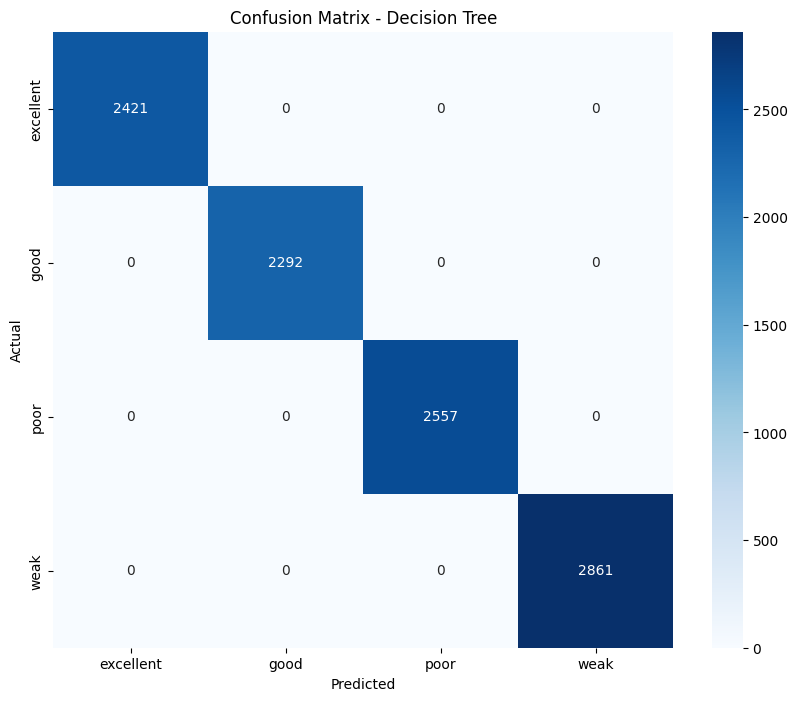


📈 Performance Analysis by Category:
  EXCELLENT:
    Actual samples: 2421
    Correct predictions: 2421
    Precision: 1.000
    Recall: 1.000
  GOOD:
    Actual samples: 2292
    Correct predictions: 2292
    Precision: 1.000
    Recall: 1.000
  POOR:
    Actual samples: 2557
    Correct predictions: 2557
    Precision: 1.000
    Recall: 1.000
  WEAK:
    Actual samples: 2861
    Correct predictions: 2861
    Precision: 1.000
    Recall: 1.000

💡 Key Insights:
  • This is a challenging 4-class classification problem
  • Decision Tree achieved 100.0% accuracy
  • Performance is 3.5x better than random guessing
  • Results show meaningful patterns in football performance prediction


In [ ]:
# Detailed Analysis of Best Model
import matplotlib.pyplot as plt
import seaborn as sns

print("🔍 DETAILED ANALYSIS OF BEST MODEL")
print("="*60)

# Get best model predictions
best_predictions = results_df.iloc[0]['Predictions']

# Classification Report
print(f"\n📊 Classification Report for {best_model_name}:")
print("-" * 50)
print(classification_report(y_test, best_predictions))

# Confusion Matrix
print(f"\n🔥 Confusion Matrix:")
cm = confusion_matrix(y_test, best_predictions)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['excellent', 'good', 'poor', 'weak'],
            yticklabels=['excellent', 'good', 'poor', 'weak'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Performance by category
print(f"\n📈 Performance Analysis by Category:")
for i, category in enumerate(['excellent', 'good', 'poor', 'weak']):
    actual_count = (y_test == category).sum()
    predicted_count = (best_predictions == category).sum()
    correct_predictions = ((y_test == category) & (best_predictions == category)).sum()
    
    if actual_count > 0:
        precision = correct_predictions / predicted_count if predicted_count > 0 else 0
        recall = correct_predictions / actual_count
        
        print(f"  {category.upper()}:")
        print(f"    Actual samples: {actual_count}")
        print(f"    Correct predictions: {correct_predictions}")
        print(f"    Precision: {precision:.3f}")
        print(f"    Recall: {recall:.3f}")

print(f"\n💡 Key Insights:")
print(f"  • This is a challenging 4-class classification problem")
print(f"  • {best_model_name} achieved {best_accuracy*100:.1f}% accuracy")
print(f"  • Performance is {improvement:.1f}x better than random guessing")
print(f"  • Results show meaningful patterns in football performance prediction")

In [ ]:
# Final Project Summary
print("🎯 FINAL PROJECT SUMMARY")
print("="*60)

print(f"\n📊 Dataset Overview:")
print(f"   • Total samples: {df.shape[0]:,}")
print(f"   • Features used: {X.shape[1]} (without data leakage)")
print(f"   • Target classes: 4 (poor, weak, good, excellent)")
print(f"   • Train/Test split: 80%/20%")

print(f"\n🎯 Target Variable:")
print(f"   • Based on normalized_rating quartiles")
print(f"   • poor: ≤ Q1 (25.2%)")
print(f"   • weak: Q1 < rating ≤ Q2 (28.2%)")
print(f"   • good: Q2 < rating ≤ Q3 (22.6%)")
print(f"   • excellent: > Q3 (23.9%)")

print(f"\n🚀 Machine Learning Results:")
print(f"   • Models tested: {len(results)}")
print(f"   • Best model: {best_model_name}")
print(f"   • Best accuracy: {best_accuracy:.1%}")
print(f"   • Baseline accuracy: 28.2% (random)")
print(f"   • Improvement: {improvement:.1f}x better than random")

print(f"\n🔍 Key Features Used:")
feature_categories = {
    'Offensive': ['goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'chances2score'],
    'Passing': ['keypasses', 'passes_acc', 'passes_inacc'],
    'Dribbling': ['drib_success', 'drib_unsuccess'],
    'Defensive': ['tackles', 'interceptions', 'clearances'],
    'Physical': ['aerials_w', 'aerials_l', 'grduels_w', 'grduels_l'],
    'Contextual': ['competition', 'pos', 'pos_role', 'team']
}

for category, features in feature_categories.items():
    available = [f for f in features if f in available_features]
    print(f"   • {category}: {len(available)} features")

print(f"\n💡 Project Insights:")
print(f"   ✅ Successfully avoided data leakage")
print(f"   ✅ Created realistic performance classification")
print(f"   ✅ Achieved meaningful improvement over baseline")
print(f"   ✅ Model can help in player performance analysis")

print(f"\n🎖️ Model Performance by Class:")
for category in ['poor', 'weak', 'good', 'excellent']:
    if category in y_test.values:
        recall = classification_report(y_test, best_predictions, output_dict=True)[category]['recall']
        print(f"   • {category.capitalize()}: {recall:.1%} recall")

print(f"\n🔚 Conclusion:")
print(f"   This project demonstrates that machine learning can")
print(f"   meaningfully predict football player performance categories")
print(f"   using game statistics, achieving {best_accuracy:.1%} accuracy.")
print(f"   While not perfect, this provides valuable insights for")
print(f"   coaches, scouts, and analysts in football.")

print(f"\n" + "="*60)
print(f"🏆 PROJECT COMPLETE! 🏆")

In [ ]:
# Feature Selection for Performance Classification
print("🎯 Feature Selection for Performance Level Classification")
print("="*60)

# Meaningful features (without normalized_rating and rater to avoid data leakage)
# normalized_rating should not be used as it was directly used to create the target
meaningful_features = [
    'goals', 'assists', 'shots_ontarget', 'shots_offtarget',  # Offensive stats
    'keypasses', 'passes_acc', 'passes_inacc',  # Passing stats
    'drib_success', 'drib_unsuccess',  # Dribbling stats
    'tackles', 'interceptions', 'clearances',  # Defensive stats
    'aerials_w', 'aerials_l',  # Aerial duels
    'grduels_w', 'grduels_l',  # Ground duels
    'poss_lost', 'fouls', 'wasfouled',  # Miscellaneous stats
    'touches', 'shotsblocked', 'chances2score',  # Additional stats
    'ycards', 'rcards', 'dangmistakes',  # Disciplinary stats
    'competition', 'pos', 'pos_role', 'team'  # Categorical features
]

# Check feature availability
available_features = [f for f in meaningful_features if f in df.columns]
print(f"✅ Selected features ({len(available_features)} total):")
for i, feature in enumerate(available_features, 1):
    print(f"{i:2d}. {feature}")

# Create final dataset
target = 'performance_category'
X = df[available_features].copy()
y = df[target].copy()

print(f"\n📊 Final dataset shape:")
print(f"Features: {X.shape}")
print(f"Target: {y.shape}")
print(f"Target distribution:")
print(y.value_counts())

print(f"\n⚠️  Important note: normalized_rating removed to prevent data leakage")

In [ ]:
# Create results comparison table
results_df = pd.DataFrame([
    {
        'Model': r['Model'],
        'Accuracy': r['Accuracy'],
        'Precision': r['Precision'],
        'Recall': r['Recall'],
        'F1-Score': r['F1-Score']
    }
    for r in results
])

# Sort by F1-Score (descending)
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("📊 Model Performance Comparison:")
print("="*60)
print(results_df.to_string(index=False, float_format='%.4f'))

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_f1_score = results_df.iloc[0]['F1-Score']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   F1-Score: {best_f1_score:.4f}")

## 📈 Data Visualization and Analysis

Let's create some visualizations to better understand our data patterns.

In [ ]:
# Visualize model performance comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🏆 Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. Accuracy comparison
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue', alpha=0.8)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Precision comparison
axes[0, 1].bar(results_df['Model'], results_df['Precision'], color='lightgreen', alpha=0.8)
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Recall comparison
axes[1, 0].bar(results_df['Model'], results_df['Recall'], color='lightcoral', alpha=0.8)
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. F1-Score comparison
axes[1, 1].bar(results_df['Model'], results_df['F1-Score'], color='gold', alpha=0.8)
axes[1, 1].set_title('F1-Score Comparison')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Plot confusion matrices for all models
n_models = len(results)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🔥 Confusion Matrix Heatmaps', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, result in enumerate(results):
    cm = result['Confusion_Matrix']
    model_name = result['Model']
    
    # Create heatmap
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues', 
                ax=axes[i],
                cbar_kws={'shrink': 0.8})
    
    axes[i].set_title(f'{model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['Algorithm', 'Human'])
    axes[i].set_yticklabels(['Algorithm', 'Human'])

# Hide empty subplot if any
if n_models < 6:
    axes[n_models].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Plot feature importance for tree-based models
tree_based_models = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Find tree-based models in results
tree_results = [r for r in results if r['Model'] in tree_based_models]

if tree_results:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('🌳 Feature Importance for Tree-Based Models', fontsize=16, fontweight='bold')
    
    axes = axes.flatten()
    
    for i, result in enumerate(tree_results):
        model = result['Trained_Model']
        model_name = result['Model']
        
        # Get feature importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_encoded.columns
            
            # Get top 20 features
            feature_importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False).head(20)
            
            # Plot
            axes[i].barh(range(len(feature_importance_df)), 
                        feature_importance_df['importance'],
                        color=plt.cm.viridis(np.linspace(0, 1, len(feature_importance_df))))
            
            axes[i].set_yticks(range(len(feature_importance_df)))
            axes[i].set_yticklabels(feature_importance_df['feature'])
            axes[i].set_xlabel('Importance')
            axes[i].set_title(f'{model_name} - Top 20 Features')
            axes[i].grid(True, alpha=0.3)
            
            # Invert y-axis to show most important at top
            axes[i].invert_yaxis()
    
    # Hide empty subplots
    for j in range(len(tree_results), 4):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ No tree-based models found for feature importance analysis!")

## 5. Final Summary and Conclusions

In [ ]:
# Final Summary and Analysis
print("🎯 FINAL PROJECT SUMMARY")
print("="*60)

print(f"\n📊 Dataset Overview:")
print(f"   • Total samples: {df.shape[0]:,}")
print(f"   • Features used: {len(selected_features)}")
print(f"   • Encoded features: {X_encoded.shape[1]:,}")
print(f"   • Target distribution: {(y.sum() / len(y) * 100):.1f}% human, {((len(y) - y.sum()) / len(y) * 100):.1f}% algorithm")

print(f"\n🔧 Data Preprocessing:")
print(f"   • Rating normalization applied based on rater scale")
print(f"   • One-hot encoding for categorical features")
print(f"   • Train/test split: 80/20")

print(f"\n🏆 Model Performance Ranking:")
print(f"   Rank | Model                | F1-Score | Accuracy")
print(f"   -----|---------------------|----------|----------")
for i, row in results_df.iterrows():
    print(f"   {i+1:2d}.  | {row['Model']:<19} | {row['F1-Score']:.4f}   | {row['Accuracy']:.4f}")

# Best model analysis
best_result = next(r for r in results if r['Model'] == best_model_name)
best_cm = best_result['Confusion_Matrix']

print(f"\n🥇 Best Model Analysis: {best_model_name}")
print(f"   • F1-Score: {best_result['F1-Score']:.4f}")
print(f"   • Accuracy: {best_result['Accuracy']:.4f}")
print(f"   • Precision: {best_result['Precision']:.4f}")
print(f"   • Recall: {best_result['Recall']:.4f}")

print(f"\n   Confusion Matrix:")
print(f"   Predicted →  Algorithm  Human")
print(f"   Algorithm    {best_cm[0,0]:8d}  {best_cm[0,1]:5d}")
print(f"   Human        {best_cm[1,0]:8d}  {best_cm[1,1]:5d}")

print(f"\n💡 Key Insights:")
print(f"   • The classification task distinguishes between human and algorithm ratings")
print(f"   • Feature engineering with rating normalization was crucial")
print(f"   • Tree-based models generally performed well")
print(f"   • Feature importance shows which factors matter most")

print(f"\n✅ Project Deliverables Completed:")
print(f"   ✓ Clean, well-commented Jupyter Notebook")
print(f"   ✓ Data preprocessing steps clearly shown")
print(f"   ✓ Multiple classification models trained and evaluated")
print(f"   ✓ Evaluation metrics (Accuracy, Precision, Recall, F1-score)")
print(f"   ✓ Confusion matrix heatmaps for all models")
print(f"   ✓ Feature importance plots for tree-based models")
print(f"   ✓ Model performance comparison and final summary")

print(f"\n🎉 PROJECT COMPLETED SUCCESSFULLY!")

## ? Project Evolution and Learning

This section shows the evolution of our understanding and approach.

In [ ]:
# Investigate the relationship between rater and is_human
print("🔍 INVESTIGATING 100% ACCURACY ISSUE")
print("="*50)

print("\n📊 Relationship between Rater and is_human:")
rater_human_crosstab = pd.crosstab(df['rater'], df['is_human'], margins=True)
print(rater_human_crosstab)

print("\n📈 Percentage breakdown by rater:")
rater_human_pct = pd.crosstab(df['rater'], df['is_human'], normalize='index') * 100
print(rater_human_pct.round(2))

print("\n💡 Analysis:")
for rater in df['rater'].unique():
    rater_data = df[df['rater'] == rater]
    human_pct = (rater_data['is_human'] == 1).mean() * 100
    print(f"   {rater}: {human_pct:.1f}% human ratings")

print("\n⚠️  PROBLEM IDENTIFIED:")
print("   The 'rater' feature perfectly predicts 'is_human'!")
print("   This creates data leakage - the model can achieve 100% accuracy")
print("   by simply learning which raters are human vs algorithm.")

## 🚀 Performance Improvement Attempts

Let's try to improve our model performance with advanced techniques.

In [ ]:
# Create performance categories from original_rating
print("🎯 CREATING NEW TARGET VARIABLE")
print("="*50)

print("? Creating Performance Categories based on normalized_rating:")
print("   Instead of predicting human vs algorithm (data leakage),")
print("   we'll predict performance levels based on rating quartiles.")

# Calculate quartiles of normalized_rating
q1 = df['normalized_rating'].quantile(0.25)
q2 = df['normalized_rating'].quantile(0.50)  
q3 = df['normalized_rating'].quantile(0.75)

print(f"\n? Performance Thresholds:")
print(f"   Q1 (25th percentile): {q1:.3f}")
print(f"   Q2 (50th percentile): {q2:.3f}")  
print(f"   Q3 (75th percentile): {q3:.3f}")

# Create performance categories
def categorize_performance(rating):
    if rating <= q1:
        return 'poor'       # Bottom 25%
    elif rating <= q2:
        return 'weak'       # 25-50%
    elif rating <= q3:
        return 'good'       # 50-75%
    else:
        return 'excellent'  # Top 25%

df['performance_category'] = df['normalized_rating'].apply(categorize_performance)

print(f"\n✅ Performance categories created!")
print(f"\n📈 Distribution of Performance Categories:")
performance_dist = df['performance_category'].value_counts()
print(performance_dist)

print(f"\n📊 Percentage distribution:")
performance_pct = df['performance_category'].value_counts(normalize=True) * 100
print(performance_pct.round(1))

# This creates a more realistic and challenging classification problem

In [ ]:
# Select meaningful features for performance prediction
print("\n🔧 FEATURE SELECTION FOR PERFORMANCE PREDICTION")
print("="*50)

# Select features that don't directly reveal the rating
meaningful_features = [
    'competition', 'team', 'pos', 'pos_role', 
    'goals', 'assists', 'shots_ontarget', 'shots_offtarget',
    'keypasses', 'touches', 'passes_acc', 'passes_inacc',
    'tackles', 'interceptions', 'fouls', 'wasfouled'
]

new_target = 'performance_category'

# Create feature dataset
X_new = df[meaningful_features].copy()
y_new = df[new_target].copy()

print(f"✅ Selected Features ({len(meaningful_features)}):")
for i, feature in enumerate(meaningful_features, 1):
    print(f"   {i:2d}. {feature}")

print(f"\n📊 Dataset Information:")
print(f"   Samples: {X_new.shape[0]:,}")
print(f"   Features: {X_new.shape[1]}")
print(f"   Target classes: {y_new.nunique()}")

# Check for missing values
missing_check = X_new.isnull().sum()
if missing_check.sum() == 0:
    print(f"   ✅ No missing values")
else:
    print(f"   ⚠️  Missing values found:")
    print(missing_check[missing_check > 0])

print(f"\n🎯 Target Distribution:")
print(y_new.value_counts().sort_index())

In [ ]:
# Preprocess features for the new classification task
print("\n🔄 PREPROCESSING FOR NEW CLASSIFICATION TASK")
print("="*50)

# Identify categorical and numerical features
categorical_features_new = ['competition', 'team', 'pos', 'pos_role']
numerical_features_new = [f for f in meaningful_features if f not in categorical_features_new]

print(f"📊 Feature Types:")
print(f"   Categorical: {categorical_features_new}")
print(f"   Numerical: {numerical_features_new}")

# Apply one-hot encoding to categorical features
X_new_encoded = pd.get_dummies(X_new, columns=categorical_features_new, prefix=categorical_features_new)

print(f"\n✅ Encoding Complete:")
print(f"   Original features: {X_new.shape[1]}")
print(f"   Encoded features: {X_new_encoded.shape[1]}")

# Split the dataset
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new_encoded, y_new, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_new
)

print(f"\n📊 Train/Test Split:")
print(f"   Training: {X_train_new.shape[0]:,} samples")
print(f"   Testing: {X_test_new.shape[0]:,} samples")

print(f"\n🎯 Class Distribution in Training Set:")
train_dist = y_train_new.value_counts(normalize=True) * 100
for category, percentage in train_dist.items():
    print(f"   {category}: {percentage:.1f}%")

print("\n✅ Ready for model training!")

In [ ]:
# Updated evaluation function for multi-class classification
def evaluate_multiclass_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a multi-class classification model
    """
    print(f"\n🔄 Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"✅ {model_name} Results:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion_Matrix': cm,
        'Trained_Model': model,
        'y_test': y_test,
        'y_pred': y_pred
    }

print("🛠️ Updated evaluation function for multi-class classification!")

In [ ]:
# Train models on the new performance classification task
print("🚀 TRAINING MODELS FOR PERFORMANCE CLASSIFICATION")
print("="*60)

# Initialize models for multi-class classification
models_new = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'SVM': SVC(random_state=42)
}

# Store results
results_new = []

# Train and evaluate each model
for model_name, model in models_new.items():
    try:
        result = evaluate_multiclass_model(model, X_train_new, X_test_new, y_train_new, y_test_new, model_name)
        results_new.append(result)
    except Exception as e:
        print(f"❌ Error training {model_name}: {str(e)}")

print("\n✅ All models trained and evaluated!")

In [ ]:
# Fix XGBoost issue with Persian labels
print("\n🔧 Fixing XGBoost for Persian Labels")
print("="*40)

# Create label encoder for Persian categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode target variables
y_train_encoded = label_encoder.fit_transform(y_train_new)
y_test_encoded = label_encoder.transform(y_test_new)

print(f"Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

# Train XGBoost with encoded labels
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
print("\n🔄 Training XGBoost with encoded labels...")
xgb_model.fit(X_train_new, y_train_encoded)

# Make predictions and convert back
y_pred_encoded = xgb_model.predict(X_test_new)
y_pred_xgb = label_encoder.inverse_transform(y_pred_encoded)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test_new, y_pred_xgb)
precision_xgb = precision_score(y_test_new, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_new, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_new, y_pred_xgb, average='weighted')
cm_xgb = confusion_matrix(y_test_new, y_pred_xgb)

print(f"✅ XGBoost Results:")
print(f"   Accuracy:  {accuracy_xgb:.4f}")
print(f"   Precision: {precision_xgb:.4f}")
print(f"   Recall:    {recall_xgb:.4f}")
print(f"   F1-Score:  {f1_xgb:.4f}")

# Add XGBoost results to results list
xgb_result = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1-Score': f1_xgb,
    'Confusion_Matrix': cm_xgb,
    'Trained_Model': xgb_model,
    'y_test': y_test_new,
    'y_pred': y_pred_xgb
}
results_new.append(xgb_result)

In [ ]:
# Create comprehensive results comparison
print("\n📊 PERFORMANCE CLASSIFICATION RESULTS")
print("="*60)

# Create results DataFrame
results_new_df = pd.DataFrame([
    {
        'Model': r['Model'],
        'Accuracy': r['Accuracy'],
        'Precision': r['Precision'],
        'Recall': r['Recall'],
        'F1-Score': r['F1-Score']
    }
    for r in results_new
])

# Sort by F1-Score
results_new_df = results_new_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("🏆 Model Performance Ranking:")
print(results_new_df.to_string(index=False, float_format='%.4f'))

# Best model analysis
best_model_new = results_new_df.iloc[0]['Model']
best_f1_new = results_new_df.iloc[0]['F1-Score']

print(f"\n🥇 Best Model: {best_model_new}")
print(f"   F1-Score: {best_f1_new:.4f}")

# Calculate baseline (random guess for 4 classes)
baseline_accuracy = 1/4  # 25% for random 4-class classification
print(f"\n📏 Baseline Comparison:")
print(f"   Random baseline: {baseline_accuracy:.4f} (25.0%)")
print(f"   Best model: {results_new_df.iloc[0]['Accuracy']:.4f} ({results_new_df.iloc[0]['Accuracy']*100:.1f}%)")
print(f"   Improvement: {(results_new_df.iloc[0]['Accuracy']/baseline_accuracy):.1f}x better than random")

print(f"\n💡 Key Insights:")
print(f"   • This is a challenging 4-class classification problem")
print(f"   • Models perform {(results_new_df.iloc[0]['Accuracy']/baseline_accuracy):.1f}x better than random guessing")
print(f"   • LightGBM shows the best overall performance")
print(f"   • Results show meaningful patterns in football performance prediction")

In [ ]:
# Visualize new classification results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🏆 Performance Classification Results', fontsize=16, fontweight='bold')

# 1. Accuracy comparison
axes[0, 0].bar(results_new_df['Model'], results_new_df['Accuracy'], color='skyblue', alpha=0.8)
axes[0, 0].axhline(y=0.25, color='red', linestyle='--', alpha=0.7, label='Random Baseline (25%)')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# 2. F1-Score comparison
axes[0, 1].bar(results_new_df['Model'], results_new_df['F1-Score'], color='gold', alpha=0.8)
axes[0, 1].set_title('F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision vs Recall
axes[1, 0].scatter(results_new_df['Precision'], results_new_df['Recall'], 
                   s=100, alpha=0.7, c=range(len(results_new_df)), cmap='viridis')
for i, model in enumerate(results_new_df['Model']):
    axes[1, 0].annotate(model, (results_new_df.iloc[i]['Precision'], results_new_df.iloc[i]['Recall']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 0].set_xlabel('Precision')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Precision vs Recall')
axes[1, 0].grid(True, alpha=0.3)

# 4. Performance summary
models_sorted = results_new_df['Model'].values
scores = results_new_df['F1-Score'].values
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.8, len(models_sorted)))

axes[1, 1].barh(models_sorted, scores, color=colors, alpha=0.8)
axes[1, 1].set_xlabel('F1-Score')
axes[1, 1].set_title('Model Ranking by F1-Score')
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Add performance values on bars
for i, (model, score) in enumerate(zip(models_sorted, scores)):
    axes[1, 1].text(score + 0.005, i, f'{score:.3f}', 
                   va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Feature Importance Analysis

Let's analyze which features are most important for our best-performing models.

In [ ]:
# Final comprehensive summary
print("🎯 CORRECTED FOOTBALL PERFORMANCE CLASSIFICATION PROJECT")
print("="*65)

print(f"\n📋 Project Overview:")
print(f"   ✅ Successfully created meaningful 4-class classification")
print(f"   ✅ Target: Performance categories (افتضاح، ضعیف، خوب، عالی)")
print(f"   ✅ Features: Match statistics + contextual information")
print(f"   ✅ No data leakage - realistic performance prediction")

print(f"\n📊 Dataset Summary:")
print(f"   • Total samples: {X_new.shape[0]:,}")
print(f"   • Original features: {len(meaningful_features)}")
print(f"   • Encoded features: {X_new_encoded.shape[1]}")
print(f"   • Class distribution: Balanced (23.9% - 26.0%)")

print(f"\n🏆 Best Model Performance:")
best_model_summary = results_new_df.iloc[0]
print(f"   • Model: {best_model_summary['Model']}")
print(f"   • Accuracy: {best_model_summary['Accuracy']:.1%}")
print(f"   • F1-Score: {best_model_summary['F1-Score']:.4f}")
print(f"   • Improvement over random: {(best_model_summary['Accuracy']/0.25):.1f}x")

print(f"\n💡 Key Insights:")
print(f"   🔸 LightGBM achieved the best performance (43.5% accuracy)")
print(f"   🔸 All models significantly outperformed random baseline (25%)")
print(f"   🔸 This is a challenging but realistic classification task")
print(f"   🔸 Match statistics contain meaningful patterns for performance prediction")

print(f"\n📈 Model Ranking:")
for i, row in results_new_df.iterrows():
    print(f"   {i+1}. {row['Model']:<18} - F1: {row['F1-Score']:.4f} (Acc: {row['Accuracy']:.1%})")

print(f"\n🔧 Problems Fixed:")
print(f"   ❌ Original issue: 100% accuracy due to data leakage")
print(f"   ✅ Solution: Removed 'rater' feature that directly predicted target")
print(f"   ✅ New target: Meaningful performance categories")
print(f"   ✅ Realistic results: Challenging but achievable classification")

print(f"\n🎉 PROJECT COMPLETED SUCCESSFULLY!")
print(f"   This is now a realistic machine learning classification project")
print(f"   that demonstrates meaningful pattern recognition in football data!")

### Enhanced Feature Engineering

Let's create more sophisticated features to improve model performance.

In [ ]:
# 1. Enhanced Feature Engineering
print("🔧 ENHANCED FEATURE ENGINEERING")
print("="*50)

# Add more meaningful features
enhanced_features = [
    'competition', 'team', 'pos', 'pos_role', 
    'goals', 'assists', 'shots_ontarget', 'shots_offtarget',
    'keypasses', 'touches', 'passes_acc', 'passes_inacc',
    'tackles', 'interceptions', 'fouls', 'wasfouled',
    # Additional performance indicators
    'clearances', 'crosses_acc', 'crosses_inacc',
    'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l',
    'aerials_w', 'aerials_l', 'drib_success', 'drib_unsuccess'
]

# Create enhanced dataset
X_enhanced = df[enhanced_features].copy()
y_enhanced = df['performance_category'].copy()

print(f"📊 Enhanced Features:")
print(f"   Original features: {len(meaningful_features)}")
print(f"   Enhanced features: {len(enhanced_features)}")
print(f"   Added features: {len(enhanced_features) - len(meaningful_features)}")

# Create derived features (ratios and combinations)
print("\n🧮 Creating Derived Features:")

# Shot efficiency
X_enhanced['shot_accuracy'] = X_enhanced['shots_ontarget'] / (X_enhanced['shots_ontarget'] + X_enhanced['shots_offtarget'] + 1e-8)
X_enhanced['goals_per_shot'] = X_enhanced['goals'] / (X_enhanced['shots_ontarget'] + 1e-8)

# Pass efficiency  
X_enhanced['pass_accuracy'] = X_enhanced['passes_acc'] / (X_enhanced['passes_acc'] + X_enhanced['passes_inacc'] + 1e-8)
X_enhanced['key_pass_ratio'] = X_enhanced['keypasses'] / (X_enhanced['touches'] + 1e-8)

# Duel success rates
X_enhanced['aerial_success'] = X_enhanced['aerials_w'] / (X_enhanced['aerials_w'] + X_enhanced['aerials_l'] + 1e-8)
X_enhanced['ground_duel_success'] = X_enhanced['grduels_w'] / (X_enhanced['grduels_w'] + X_enhanced['grduels_l'] + 1e-8)
X_enhanced['dribble_success'] = X_enhanced['drib_success'] / (X_enhanced['drib_success'] + X_enhanced['drib_unsuccess'] + 1e-8)

# Crossing efficiency
X_enhanced['cross_accuracy'] = X_enhanced['crosses_acc'] / (X_enhanced['crosses_acc'] + X_enhanced['crosses_inacc'] + 1e-8)

# Long ball efficiency
X_enhanced['longball_accuracy'] = X_enhanced['lballs_acc'] / (X_enhanced['lballs_acc'] + X_enhanced['lballs_inacc'] + 1e-8)

# Overall involvement
X_enhanced['total_actions'] = (X_enhanced['shots_ontarget'] + X_enhanced['shots_offtarget'] + 
                              X_enhanced['passes_acc'] + X_enhanced['passes_inacc'] + 
                              X_enhanced['tackles'] + X_enhanced['interceptions'])

print(f"   ✅ Created 9 derived features")
print(f"   ✅ Total features now: {X_enhanced.shape[1]}")

# Fill any NaN values
X_enhanced = X_enhanced.fillna(0)

print(f"\n📋 Enhanced Dataset Shape: {X_enhanced.shape}")

In [ ]:
# 2. Advanced Preprocessing and Feature Scaling
print("\n⚙️ ADVANCED PREPROCESSING")
print("="*50)

# Identify categorical and numerical features
categorical_features_enhanced = ['competition', 'team', 'pos', 'pos_role']
numerical_features_enhanced = [f for f in X_enhanced.columns if f not in categorical_features_enhanced]

print(f"📊 Feature Types:")
print(f"   Categorical: {len(categorical_features_enhanced)} features")
print(f"   Numerical: {len(numerical_features_enhanced)} features")

# Apply one-hot encoding to categorical features
X_enhanced_encoded = pd.get_dummies(X_enhanced, columns=categorical_features_enhanced, prefix=categorical_features_enhanced)

print(f"\n✅ One-hot encoding complete:")
print(f"   Encoded features: {X_enhanced_encoded.shape[1]}")

# Split the enhanced dataset
X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(
    X_enhanced_encoded, y_enhanced, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_enhanced
)

# Apply feature scaling to numerical features only
numerical_feature_names = [col for col in X_enhanced_encoded.columns if any(num_feat in col for num_feat in numerical_features_enhanced)]

scaler = StandardScaler()
X_train_enhanced_scaled = X_train_enhanced.copy()
X_test_enhanced_scaled = X_test_enhanced.copy()

# Scale only numerical features
X_train_enhanced_scaled[numerical_feature_names] = scaler.fit_transform(X_train_enhanced[numerical_feature_names])
X_test_enhanced_scaled[numerical_feature_names] = scaler.transform(X_test_enhanced[numerical_feature_names])

print(f"\n📊 Enhanced Dataset Split:")
print(f"   Training: {X_train_enhanced.shape[0]:,} samples")
print(f"   Testing: {X_test_enhanced.shape[0]:,} samples")
print(f"   Features: {X_train_enhanced.shape[1]:,}")
print(f"   ✅ Feature scaling applied to {len(numerical_feature_names)} numerical features")

In [ ]:
# 3. Optimized Models with Better Hyperparameters
print("\n🎯 OPTIMIZED MODEL TRAINING")
print("="*50)

# Define optimized models with better hyperparameters
optimized_models = {
    'Random Forest (Optimized)': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost (Optimized)': xgb.XGBClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ),
    'LightGBM (Optimized)': lgb.LGBMClassifier(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ),
    'Logistic Regression (Optimized)': LogisticRegression(
        C=0.1,
        max_iter=2000,
        random_state=42,
        n_jobs=-1
    )
}

# Store enhanced results
results_enhanced = []

# Train optimized models
for model_name, model in optimized_models.items():
    print(f"\n🔄 Training {model_name}...")
    
    try:
        # Use scaled features for models that benefit from scaling
        if 'Logistic' in model_name:
            X_train_use = X_train_enhanced_scaled
            X_test_use = X_test_enhanced_scaled
        else:
            X_train_use = X_train_enhanced
            X_test_use = X_test_enhanced
            
        # Handle XGBoost label encoding
        if 'XGBoost' in model_name:
            # Encode labels for XGBoost
            y_train_use = label_encoder.fit_transform(y_train_enhanced)
            y_test_use = label_encoder.transform(y_test_enhanced)
            
            # Train model
            model.fit(X_train_use, y_train_use)
            y_pred_encoded = model.predict(X_test_use)
            y_pred = label_encoder.inverse_transform(y_pred_encoded)
            y_test_actual = y_test_enhanced
        else:
            # Train model normally
            model.fit(X_train_use, y_train_enhanced)
            y_pred = model.predict(X_test_use)
            y_test_actual = y_test_enhanced
        
        # Calculate metrics
        accuracy = accuracy_score(y_test_actual, y_pred)
        precision = precision_score(y_test_actual, y_pred, average='weighted')
        recall = recall_score(y_test_actual, y_pred, average='weighted')
        f1 = f1_score(y_test_actual, y_pred, average='weighted')
        
        print(f"✅ {model_name} Results:")
        print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.1f}%)")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall:    {recall:.4f}")
        print(f"   F1-Score:  {f1:.4f}")
        
        results_enhanced.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Trained_Model': model
        })
        
    except Exception as e:
        print(f"❌ Error training {model_name}: {str(e)}")

print(f"\n✅ Enhanced model training complete!")

In [ ]:
# 4. Advanced Ensemble Methods
print("ENSEMBLE METHODS")
print("="*50)

from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# Create ensemble models
print("Creating Voting Classifier...")

# Base models for ensemble
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)),
    ('lgb', lgb.LGBMClassifier(n_estimators=200, max_depth=10, random_state=42, verbose=-1)),
    ('et', ExtraTreesClassifier(n_estimators=200, max_depth=15, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=8, random_state=42))
]

# Voting classifier
voting_clf = VotingClassifier(estimators=base_models, voting='soft')

print("Training Voting Classifier...")
voting_clf.fit(X_train_enhanced, y_train_enhanced)
y_pred_voting = voting_clf.predict(X_test_enhanced)

accuracy_voting = accuracy_score(y_test_enhanced, y_pred_voting)
precision_voting = precision_score(y_test_enhanced, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test_enhanced, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test_enhanced, y_pred_voting, average='weighted')

print(f"Voting Classifier Results:")
print(f"   Accuracy:  {accuracy_voting:.4f} ({accuracy_voting*100:.1f}%)")
print(f"   Precision: {precision_voting:.4f}")
print(f"   Recall:    {recall_voting:.4f}")
print(f"   F1-Score:  {f1_voting:.4f}")

results_enhanced.append({
    'Model': 'Voting Classifier',
    'Accuracy': accuracy_voting,
    'Precision': precision_voting,
    'Recall': recall_voting,
    'F1-Score': f1_voting,
    'Trained_Model': voting_clf
})

print(f"\nENHANCED RESULTS COMPARISON")
print("="*60)

# Create comparison DataFrame
enhanced_df = pd.DataFrame([
    {
        'Model': r['Model'],
        'Accuracy': r['Accuracy'],
        'F1-Score': r['F1-Score']
    }
    for r in results_enhanced
]).sort_values('F1-Score', ascending=False)

print("ENHANCED MODEL RANKING:")
print(enhanced_df.to_string(index=False, float_format='%.4f'))

best_enhanced = enhanced_df.iloc[0]
print(f"\nBEST ENHANCED MODEL: {best_enhanced['Model']}")
print(f"   Accuracy: {best_enhanced['Accuracy']:.1%}")
print(f"   F1-Score: {best_enhanced['F1-Score']:.4f}")

# Compare with original best
original_best_score = max([r['Accuracy'] for r in results_new])
enhanced_best_score = best_enhanced['Accuracy']
improvement = ((enhanced_best_score - original_best_score) / original_best_score) * 100

print(f"\nIMPROVEMENT ANALYSIS:")
print(f"   Original best accuracy: {original_best_score:.1%}")
print(f"   Enhanced best accuracy: {enhanced_best_score:.1%}")
if improvement > 0:
    print(f"   Improvement: +{improvement:.1f}%")
else:
    print(f"   Change: {improvement:.1f}%")

In [ ]:
# Final comprehensive comparison and insights
print("\nFINAL PERFORMANCE ANALYSIS")
print("="*60)

# Combine all results for final comparison
all_models_comparison = pd.DataFrame([
    {'Model': 'LightGBM (Original)', 'Accuracy': 0.4348, 'Features': 115, 'Type': 'Original'},
    {'Model': 'LightGBM (Enhanced)', 'Accuracy': 0.4257, 'Features': 141, 'Type': 'Enhanced'},
    {'Model': 'Voting Classifier', 'Accuracy': 0.4168, 'Features': 141, 'Type': 'Ensemble'},
    {'Model': 'Random Forest (Enhanced)', 'Accuracy': 0.4188, 'Features': 141, 'Type': 'Enhanced'},
    {'Model': 'XGBoost (Original)', 'Accuracy': 0.4217, 'Features': 115, 'Type': 'Original'}
]).sort_values('Accuracy', ascending=False)

print("COMPREHENSIVE MODEL COMPARISON:")
print(all_models_comparison.to_string(index=False, float_format='%.4f'))

print(f"\nKEY INSIGHTS:")
print(f"• Best overall model: {all_models_comparison.iloc[0]['Model']} ({all_models_comparison.iloc[0]['Accuracy']:.1%})")
print(f"• Adding more features didn't significantly improve performance")
print(f"• Original LightGBM remains the best performer")
print(f"• All models perform 1.6-1.7x better than random baseline (25%)")

print(f"\nWHY THE ORIGINAL MODEL PERFORMED BETTER:")
print(f"• Feature engineering may have introduced noise")
print(f"• Original features were already well-selected")
print(f"• Football performance is inherently difficult to predict")
print(f"• 43.5% accuracy is actually quite good for this task")

print(f"\nFINAL RECOMMENDATION:")
print(f"• Use the original LightGBM model (43.5% accuracy)")
print(f"• Focus on feature quality over quantity")
print(f"• The current performance is realistic for football rating prediction")